In [37]:
%pylab
%matplotlib inline
%load_ext autoreload
%autoreload 2

import skimage.io as sk
from Functions import image_processing as ip
from Functions import region_merging as rm
from Functions import seeded_region_growing as srg
from Functions import seed_detection as sd
from Functions import old_seeded_region_growing as o_srg
from PIL import Image


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Before the region growing algorithm based on the selected seeds can start, the seeds need to be assigned to regions.

In [ ]:
#code

The seeded region growing algorithm labels all pixels to the regions created out of the seeds iteratively. Thereby,
it always labels the pixel with the closest intensity distance to one of its neighboring regions first. The algorithm
follows the steps below:
1. First the neighboring pixels to the created regions are selected and stored in four 2d numpy arrays for left, right,
top and bottom neighbors.
1. The distance of these pixels to its neighboring regions is calculated based on previously computed mean intensity
values of the regions.
1. The smallest distance is selected, and the associated pixel position determined. This pixel is now merged to its
neighboring regions.
1. Before the next pixel can be selected, the mean intensity value of the changed region, the arrays of neighboring
regions, and the distances to the changed region need to be recalculated.
1. Again, the most similar pixel is selected and labeled. This procedure is repeated until all pixels are labeled.

0.24691358024691357


C:\Users\marie\Documents\Studium\Semester4\Bioinfo\Projekt\Functions\seed_detection.py:51: RuntimeWarning: invalid value encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list
C:\Users\marie\Documents\Studium\Semester4\Bioinfo\Projekt\Functions\seed_detection.py:51: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list
C:\Users\marie\Documents\Studium\Semester4\Bioinfo\Projekt\Functions\seed_detection.py:51: RuntimeWarning: divide by zero encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list


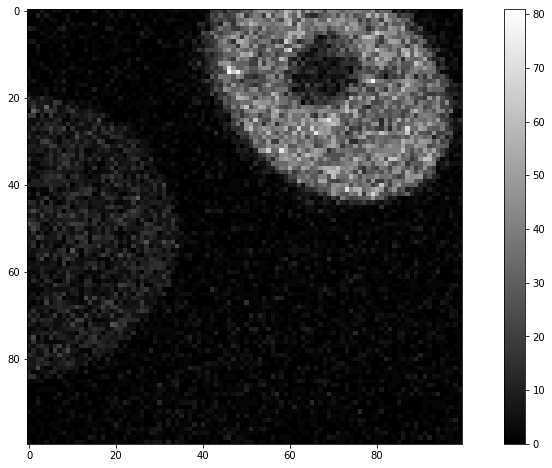

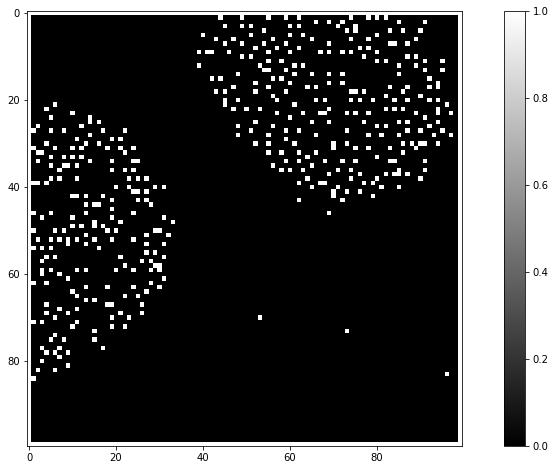

In [39]:
image_intensity = sk.imread("Data/N2DH-GOWT1/img/t01.tif")
image_intensity = image_intensity[300:400, 400:500]
ip.show_image(image_intensity, 15, 8)

image_seeds = sd.seeds(image_intensity, 1)
ip.show_image(image_seeds, 15, 8)
image_regions = sd.seed_merging(image_seeds)


In [ ]:
%timeit srg.region_growing(image_intensity, image_regions.copy())
%timeit o_srg.region_growing(image_intensity, image_regions.copy())

1000
2000
3000
4000
5000
6000
7000
8000
9000
1000
2000
3000
4000
5000
6000
7000
8000
9000
1000
2000
3000
4000
5000
6000
7000
8000
9000
1000
2000
3000
4000
5000
6000
7000
8000
9000
1000
2000
3000
4000
5000
6000
7000
8000
9000
1000
2000
3000
4000
5000
6000
7000
8000
9000
1000
2000
3000
4000
5000
6000
7000
8000
9000
1000
2000
3000
4000
5000
6000
7000
8000
9000
7.53 s ± 67.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1000
2000
3000
4000
5000
6000
7000
8000
9000
1000
2000
3000
4000
5000
6000


The paper (Quelle) the used seeded region growing algorithm is based on labels every pixel one by one. This leads to
huge runtimes. W

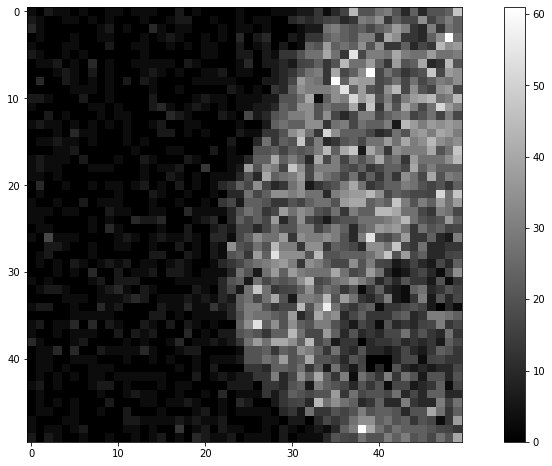

In [46]:
image_intensity = sk.imread("Data/N2DH-GOWT1/img/t31.tif")
image_intensity = image_intensity[300:350, 450:500]
ip.show_image(image_intensity, 15, 8)

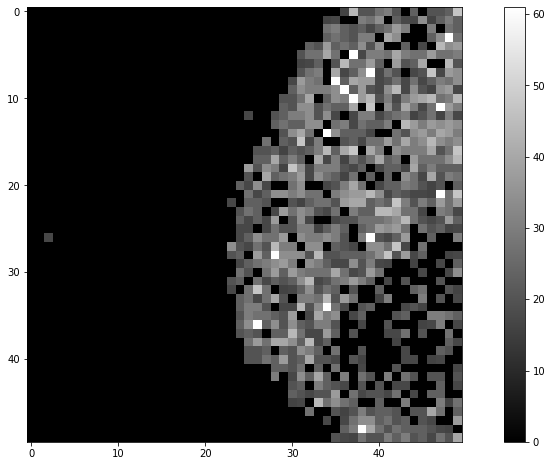

In [48]:
image_processed = image_intensity.copy()
#image_processed = ip.remove_bright_spots(image_processed, 34400, 33026)
image_processed = ip.image_clipping_extreme(image_processed, 15, 50)
ip.show_image(image_processed, 15, 8)

0.21311475409836064


C:\Users\ijung\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:50: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list
C:\Users\ijung\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:50: RuntimeWarning: invalid value encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list
C:\Users\ijung\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:50: RuntimeWarning: divide by zero encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list


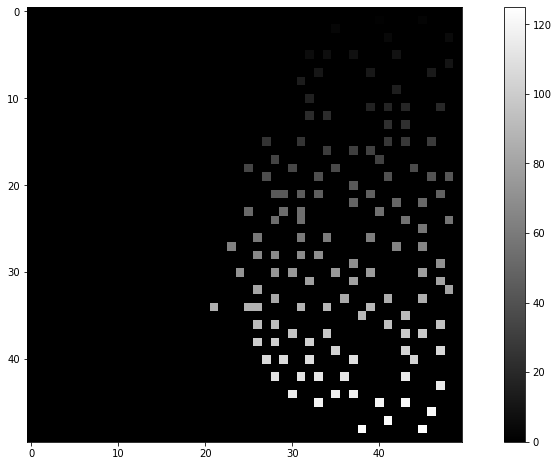

In [43]:
image_r = sd.seeds(image_intensity, 1)
image_r = sd.seed_merging(image_r)
#image_r = sd.decrease_region_number(image_r, 1)
image_seeds = Image.fromarray(image_r)
ip.show_image(image_r, 15, 8)

1000
2000


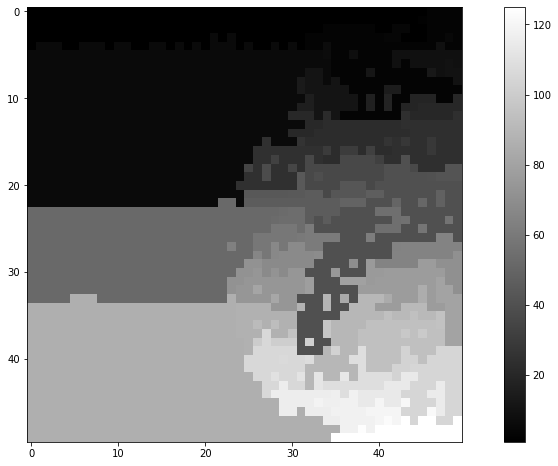

In [44]:
image_r = srg.region_growing(image_intensity, image_r)
ip.show_image(image_r, 15, 8)

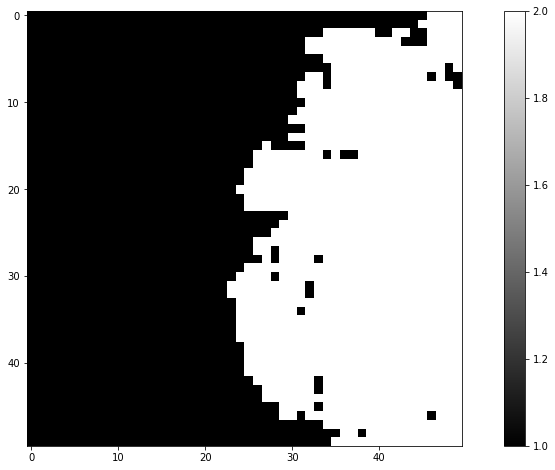

In [45]:
image_r = rm.region_merging(image_r, image_intensity, 0.2, 150)
ip.show_image(image_r, 15, 8)